<a href="https://colab.research.google.com/github/josepefg/kaggle/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Linkedin](https://img.shields.io/badge/LinkedIn-josepegerent-blue.svg)](https://bit.ly/jfg-linkedin) [![Portfólio](https://img.shields.io/badge/Portfolio-josepefg-red.svg)](https://bit.ly/jfg-portfolio) [![Medium](https://img.shields.io/badge/Medium-@josepe.gerent-green.svg)](https://bit.ly/jfg-medium)


<!-- <a href="https://bit.ly/jfg-linkedin"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/LinkedIn-josepegerent-blue.svg"></a> <a href="https://bit.ly/jfg-portfolio"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Portfolio-josepefg-red.svg"></a> <a href="https://bit.ly/jfg-medium"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Medium-@josepe.gerent-green.svg"> </a> -->

# **Detecção de Fraudes em Cartões de Crédito**  
## [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)  
_"Milhares de empresas e de consumidores são vítimas todos os dias de golpes na internet. Informação, atenção e inovação são importantes fatores para evitar estes inconvenientes."_  
(https://www.terra.com.br/noticias/dino/fraudes-todo-cuidado-e-pouco-na-hora-de-lidar-com-golpes,324d86e514b87d2dc40ae316df68b60ddbkrr5o8.html)  

Visto que fraudes com cartão de crédito atinge milhares de pessoas, tornou-se uma necessidade para as empresas fornecedoras de cartão de crédito criar soluções para tentar evitar que essas fraudes ocorressem. Dessa forma vamos explorar, através de um dataset do Kaggle, como podemos identificar quando ocorre uma fraude em um cartão utilizando algorítmos de Machine Learning.  

<p align="center">
  <img src="https://cdn.pixabay.com/photo/2018/09/12/12/04/hack-3671982_960_720.jpg" width="500" />
</p>






In [1]:
# Removendo os warnings apenas para melhor visualização
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Instalando bibliotecas faltantes
!pip install scikit-plot

In [3]:
# Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# Configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [4]:
# Como o arquivo é muito grande para salvar no Github sugiro baixar em sua máquina local e fazer o upload na hora de rodar
# O endereço para Donwload é https://www.kaggle.com/mlg-ulb/creditcardfraud/download

# Importando os dados para um dataframe através do DropBox
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

## **Entendendo os dados**  
Nesse trecho vamos analisar com mais cuidado os dados que estamos trabalhando. Vamos verificar as dimensões, os tipos de dados, as quantidades, dados estatísticos entre outros.  
O que sabemos pela descrição no Kaggle é que é um dataset altamente desbalanceado e que para proteger os dados foi aplicada uma transformação PCA para anonimizar as entradas. Foram preservadas somente as colunas _time_ e _amount_.

In [5]:
# Dimensões do dataset
print("Colunas:{}\nLinhas:\t{}".format(df.shape[1], df.shape[0]))

Colunas:31
Linhas:	284807


In [6]:
# Tipos das variáveis
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [7]:
# Amostra do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Verificar se há valores ausentes
df.isnull().sum().max()

0

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

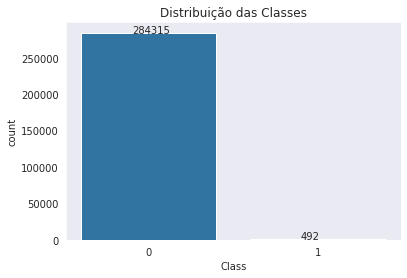

In [10]:
# Verificar o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.plot()

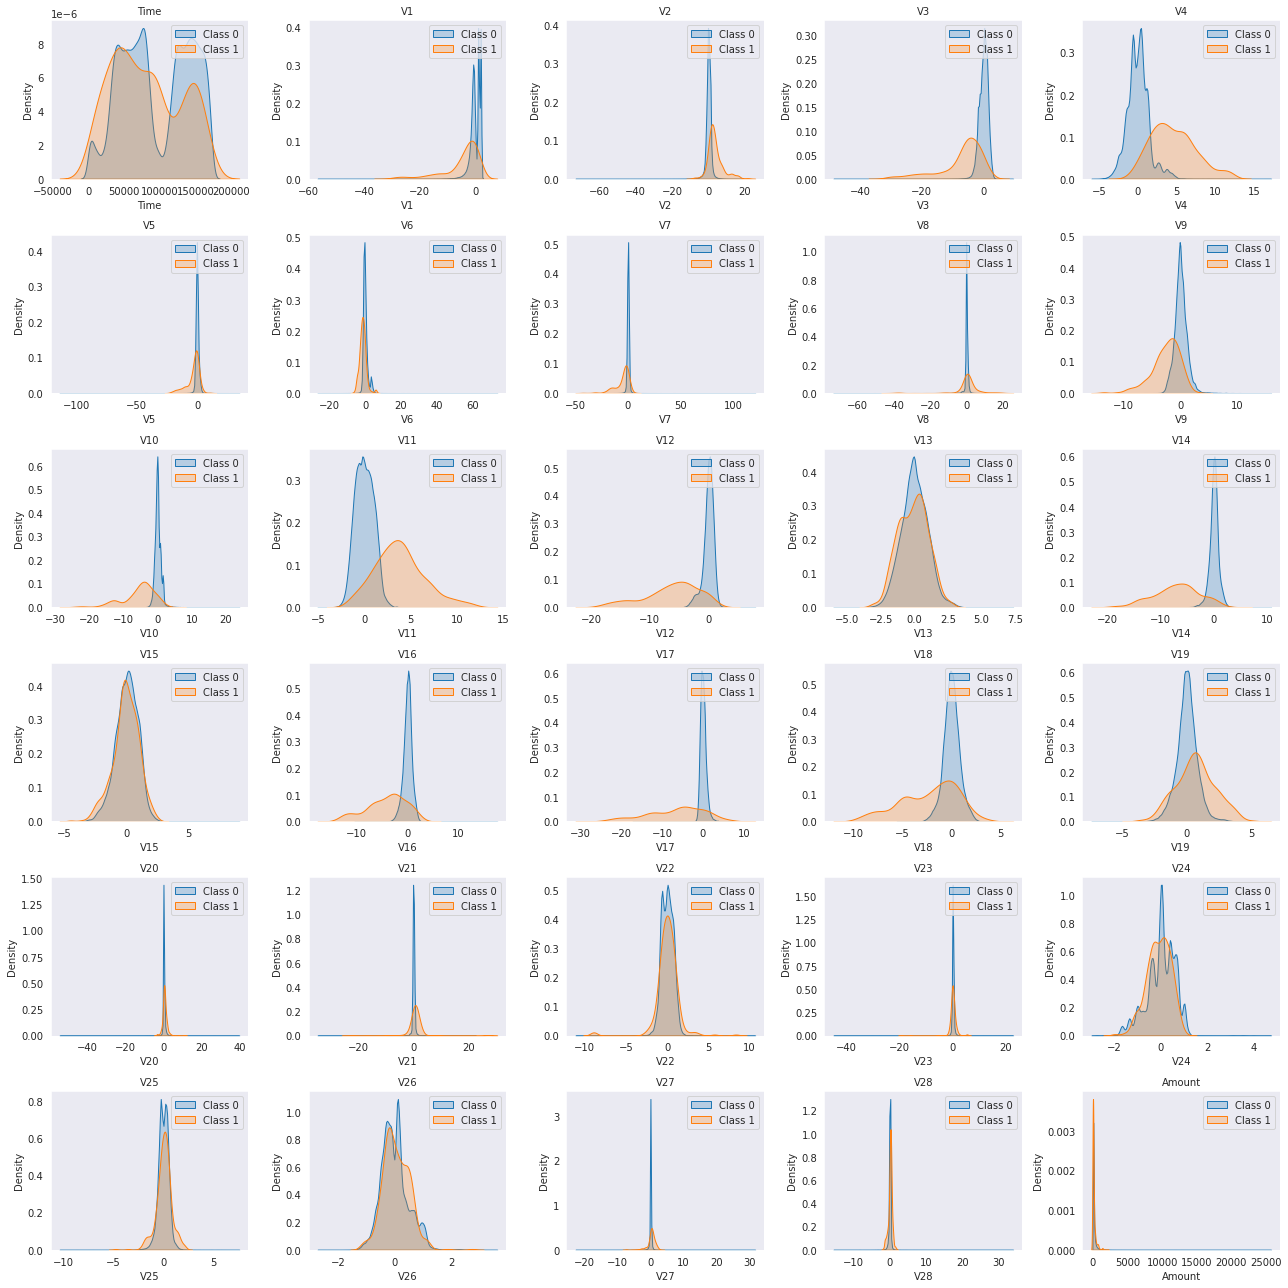

In [14]:
# Verificar o comportamento das variáveis em relação a classe
column_names = df.drop(['Class'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(6, 5, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
    plt.legend()
plt.tight_layout()

Os gráficos acima permitem verificarmos quais variáveis se destacam para detectar fraudes, ou seja, quais variáveis têm comportamentos diferentes para transações normais do que fraudes, como por exemplo V4, V9 e V11.

## **Preparando os dados**  
Para começar temos que padronizar as variáveis que não estão padronizadas (time e amount).


In [22]:
# Resumo estatístico antes da padronização
df[['Amount', 'Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


In [23]:
# Padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [25]:
# Resumo estatístico depois da padronização
df_clean[['std_amount', 'std_time']].describe()

,std_amount,std_time
count,2.848070e+05,2.848070e+05
mean,3.202236e-16,-1.050379e-14
std,1.000002e+00,1.000002e+00
min,-3.532294e-01,-1.996583e+00
25%,-3.308401e-01,-8.552120e-01
50%,-2.652715e-01,-2.131453e-01
75%,-4.471707e-02,9.372174e-01
max,1.023622e+02,1.642058e+00


### **Separando os dados e balanceando**  
Primeiro temos que separar os dados em Treino e Teste lembrando de passar o parâmetro stratify=True para que os conjuntos tenham a mesma quantidade de classes proporcionalmente. Depois podemos utilizar a técnica de Under-Sampling para balancear dataset.

In [27]:
X = df_clean.drop('Class', axis=1)
y = df['Class']

# Separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

1    369
0    369
dtype: int64

Fraudes representam 50.0000% do dataset.



[]

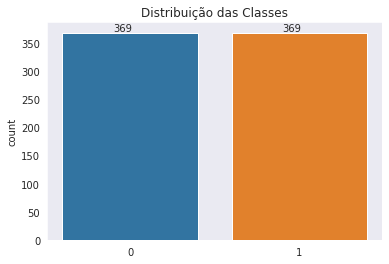

In [50]:
# Técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Balanceamento das classes
print(pd.Series(y_rus).value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((y_rus[y_rus == 1].size / y_rus.size) * 100))

# Nova distribuição de classes
fig, ax = plt.subplots()
sns.countplot(y_rus, ax=ax)
ax.set_title('Distribuição das Classes')

for p in ax.patches:
  ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))
plt.plot()

Com os dados balanceados podemos correlacionar as variáveis.

In [67]:
# plotar a matriz de correlação
corr_rus_df = pd.DataFrame(X_rus)
corr_rus_df['Class'] = y_rus

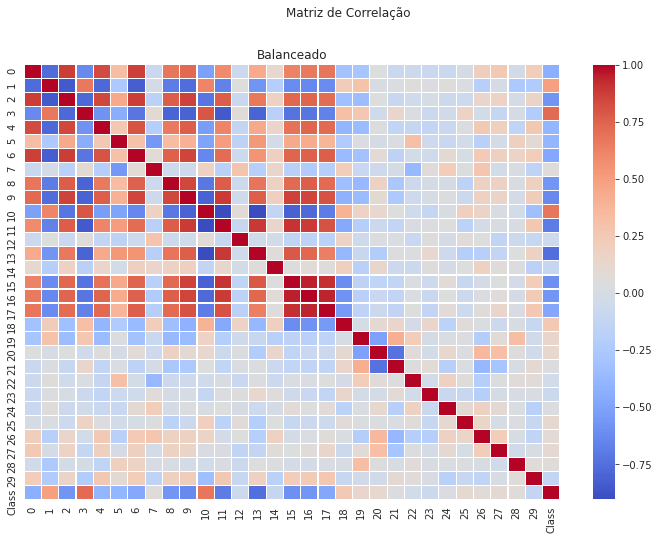

In [76]:
# plotar a matriz de correlação
corr_rus = corr_rus_df.corr()


fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns,
            linewidths=.1, cmap="coolwarm", ax=ax)
ax.set_title('Balanceado')

plt.show()

## **Modelo de Predição**  
Criando um modelo de Predição de Fraudes baseado em Regrassão Logística.

In [93]:
model = LogisticRegression()
model.fit(X_rus, y_rus)

# Previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9653    0.9823     71079
           1     0.0428    0.8943    0.0816       123

    accuracy                         0.9652     71202
   macro avg     0.5213    0.9298    0.5319     71202
weighted avg     0.9982    0.9652    0.9807     71202

Acurácia: 0.9652

AUC: 0.9298



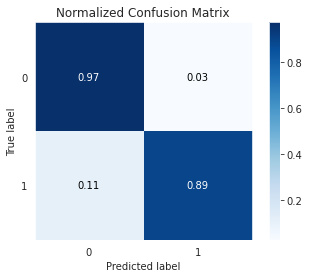

In [94]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## Conclusões

Detecção de fraudes em cartão de crédito não é um problema simples. Nesse caso utilizamos um dataset que já estava limpo, com a maioria das variáveis já padronizadas e sem valores nulos nem dados categóricos e mesmo assim tivemos que lidar com questões como o desbalanceamento de carga.

O modelo gerado é apenas um exemplo para ilustrar uma predição com os dados trabalhados porém ainda é possível melhorar os parâmetros do classificador assim como utilizar outros modelos para se comparar.